In [43]:
%matplotlib inline

import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Graphs style
plt.style.use('grayscale')
plt.rc('figure', facecolor='white', figsize=(14,4))

# CSV util
def read_csv(file):
    df = pd.read_csv(file)
    df = df.fillna(0)
    df['t'] = pd.to_datetime(df['t'], unit='s')
    df = df.set_index('t')
    return df

In [59]:
# Experiment selector

experiment_folders = sorted(glob.glob("../ops/results/*"))

def format_experiment_path(experiment, node):
    return "%s/%s/tmp/parallel-SMR/metrics" % (experiment, node)

SERVER_NODE = 'node90'
CLIENT_NODE = 'node41'
SERVER_PATH = format_experiment_path(experiment_folders[0], SERVER_NODE)
CLIENT_PATH = format_experiment_path(experiment_folders[0], CLIENT_NODE)

experiments = widgets.Dropdown(
    description='Experiment:',
    options=experiment_folders,
)

def on_value_change(evt):
    global SERVER_PATH, CLIENT_PATH
    selected = evt.owner.value
    SERVER_PATH = format_experiment_path(selected, SERVER_NODE)
    CLIENT_PATH = format_experiment_path(selected, CLIENT_NODE)

experiments.observe(on_value_change, names='value')
experiments

Dropdown(description='Experiment:', options=('../ops/results/64threads-01clients-030sparseness-000conflict-1k'…

# Client Metrics

## Requests per second and request latency

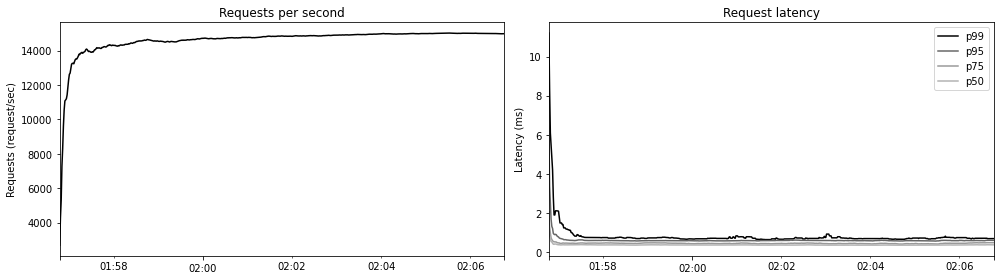

In [26]:
requests = read_csv(CLIENT_PATH + '/demo.dict.DictClient.requests.csv')
fig, (axrps, axlat) = plt.subplots(ncols=2)

requests.plot(title='Requests per second', y='mean_rate', legend=False, ax=axrps)
axrps.set_ylabel('Requests (request/sec)')
axrps.set_xlabel(None)

requests.plot(title='Request latency', y=['p99', 'p95', 'p75', 'p50'], ax=axlat)
axlat.set_ylabel('Latency (ms)')
axlat.set_xlabel(None)

plt.tight_layout()

# Server Metrics

## Throughput

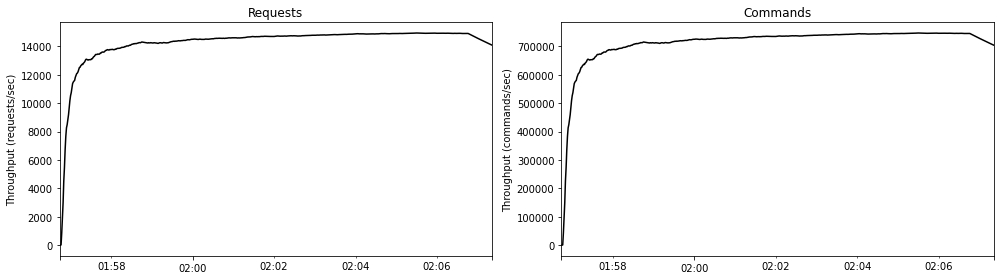

In [27]:
rps = read_csv(SERVER_PATH + '/parallelism.late.CBASEServiceReplica.requests.csv')
cps = read_csv(SERVER_PATH + '/parallelism.late.CBASEServiceReplica.commands.csv')

fig, (axrps, axcps) = plt.subplots(ncols=2)
rps.plot(title='Requests', y='mean_rate', legend=False, ax=axrps)
axrps.set_ylabel('Throughput (requests/sec)')
axrps.set_xlabel(None)

cps.plot(title='Commands', y='mean_rate', legend=False, ax=axcps)
axcps.set_ylabel('Throughput (commands/sec)')
axcps.set_xlabel(None)
plt.tight_layout()

## Graph State

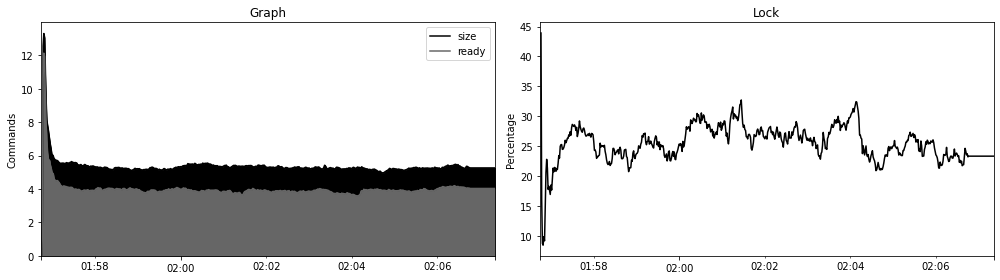

In [58]:
size = read_csv(SERVER_PATH + '/parallelism.late.graph.COS.size.csv')
ready = read_csv(SERVER_PATH + '/parallelism.late.graph.COS.ready.csv')
lock = (1 - (ready['mean'] / size['mean'])) * 100

fig, (axgraph, axlock) = plt.subplots(ncols=2)
size.plot.area(y='mean', title='Graph', ax=axgraph)
ready.plot.area(y='mean', ax=axgraph)
axgraph.set_ylabel('Commands')
axgraph.legend(["size", "ready"])
axgraph.set_xlabel(None)

lock.plot(title='Lock', ax=axlock)
axlock.set_ylabel('Percentage')
axlock.set_xlabel(None)
plt.tight_layout()